In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("forestfires.csv")
df.head(10)

from sklearn.preprocessing import LabelEncoder
le_Gender=LabelEncoder()
#adding the le_gender column to the input var df(x)
df["month_b"]=le_Gender.fit_transform(df["month"])
df["day_b"]=le_Gender.fit_transform(df["day"])
df.drop(["month","day"],axis=1,inplace=True)

list1=[0 for i in range(517)]
count=0
for index,rows in df.iterrows():
    if rows["area"]!=0:
        list1[index]=1
area_b=pd.DataFrame(list1)
df=pd.concat([df,area_b],axis=1)
df.rename({0:"area_b"},axis=1,inplace=True)
df.drop(["area"],axis=1,inplace=True)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_b,day_b,area_b
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,7,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,10,5,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,10,2,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,7,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,7,3,0


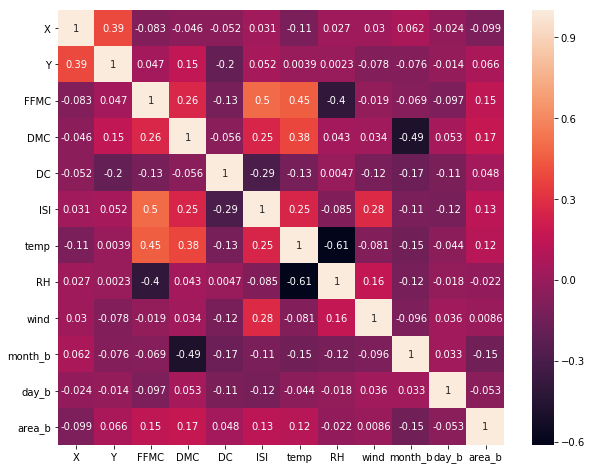

In [143]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21d3ec0c2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x21d3ec0c978>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d3ebcd3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x21d3ec0cda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d3ec14390>],
 'means': []}

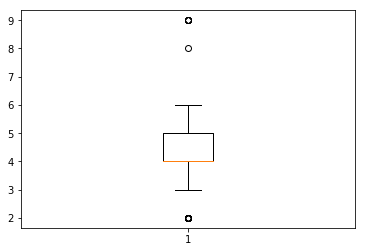

In [3]:
plt.boxplot(df["Y"])

In [4]:
#removing outleirs of Y
count=0
for index,row in df.iterrows():
    if (row["Y"]>6) or (row["Y"]<3) :
        df=df.drop(index)
        count+=1
print(df["Y"].count())
#plt.boxplot(df["Y"])
#df.info()
print(count)

466
51


In [5]:
#plt.boxplot(df["X"])

In [6]:
#plt.boxplot(df["FFMC"])

In [7]:
#removing outleirs of FFMC
count=0
for index,row in df.iterrows():
    if (row["FFMC"]>96) or (row["FFMC"]<88) :
        df=df.drop(index)
        count+=1
print(df["FFMC"].count())
#plt.boxplot(df["FFMC"])
#df.info()
print(count)

393
73


In [8]:
#plt.boxplot(df["DMC"])

In [9]:
#removing outleirs of DMC
count=0
for index,row in df.iterrows():
    if (row["DMC"]>215) or (row["DMC"]<5) :
        df=df.drop(index)
        count+=1
print(df["DMC"].count())
#plt.boxplot(df["DMC"])
#df.info()
print(count)

355
38


In [10]:
#plt.boxplot(df["DC"])

In [11]:
#removing outleirs of DC
count=0
for index,row in df.iterrows():
    if (row["DC"]>800) or (row["DC"]<450) :
        df=df.drop(index)
        count+=1
print(df["DC"].count())
#plt.boxplot(df["DC"])
#df.info()
print(count)

275
80


In [12]:
#plt.boxplot(df["ISI"])

In [13]:
#removing outleirs of ISI
count=0
for index,row in df.iterrows():
    if (row["ISI"]>15.5) or (row["ISI"]<0) :
        df=df.drop(index)
        count+=1
print(df["ISI"].count())
#plt.boxplot(df["ISI"])
#df.info()
print(count)

247
28


{'whiskers': [<matplotlib.lines.Line2D at 0x21d3e8b3e48>,
 'caps': [<matplotlib.lines.Line2D at 0x21d3e8be7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d3e8b3cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x21d3e8bee80>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d3e8bedd8>],
 'means': []}

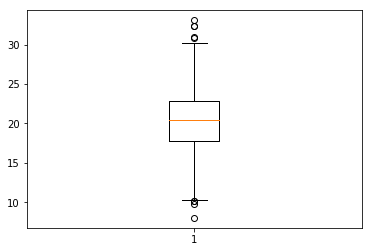

In [14]:
plt.boxplot(df["temp"])

In [15]:
#removing outleirs of temp
count=0
for index,row in df.iterrows():
    if (row["temp"]>30) or (row["temp"]<12) :
        df=df.drop(index)
        count+=1
print(df["temp"].count())
#plt.boxplot(df["temp"])
#df.info()
print(count)

230
17


In [16]:
#plt.boxplot(df["RH"])

In [17]:
#plt.boxplot(df["wind"])

In [18]:
#plt.boxplot(df["rain"])
df.drop(["rain"],axis=1,inplace=True)

In [19]:
#df.head()

In [20]:
#plt.boxplot(df["day_b"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 515
Data columns (total 12 columns):
X          230 non-null int64
Y          230 non-null int64
FFMC       230 non-null float64
DMC        230 non-null float64
DC         230 non-null float64
ISI        230 non-null float64
temp       230 non-null float64
RH         230 non-null int64
wind       230 non-null float64
month_b    230 non-null int32
day_b      230 non-null int32
area_b     230 non-null int64
dtypes: float64(6), int32(2), int64(4)
memory usage: 21.6 KB


In [22]:
#sns.countplot(x="area_b",data=df)

In [23]:
#sns.heatmap(df.corr(),annot=True)

In [24]:
# normalization
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,month_b,day_b,area_b
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,10,5,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,10,2,0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,1,3,0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,1,1,0
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,11,5,0


In [25]:
for column in ["X","Y","FFMC","DMC","DC","ISI","temp","RH","wind","month_b","day_b"]:
    min_=float(df[column].min())
    max_=float(df[column].max())
    for index,row in df.iterrows():
        df[column]=df[column].replace(row[column],(row[column]-min_)/(max_-min_))
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,month_b,day_b,area_b
1,0.750,0.333333,0.320513,0.000000,0.634309,0.184466,0.325581,0.305085,0.058824,0.9,0.833333,0
2,0.750,0.333333,0.320513,0.048368,0.685888,0.184466,0.127907,0.305085,0.105882,0.9,0.333333,0
5,0.875,1.000000,0.538462,0.290793,0.109533,0.961165,0.569767,0.237288,0.588235,0.0,0.500000,0
6,0.875,1.000000,0.538462,0.311772,0.131556,0.359223,0.680233,0.203390,0.317647,0.0,0.166667,0
8,0.875,1.000000,0.371795,0.548368,0.702405,0.213592,0.040698,0.813559,0.588235,0.0,0.833333,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
X=df.iloc[:,0:11]
Y=df.iloc[:,11]
Xtr,Xtst,Ytr,Ytst=train_test_split(X,Y,random_state=0,test_size=0.2)
scX=StandardScaler()
Xtr=scX.fit_transform(Xtr)
Xtst=scX.fit_transform(Xtst)
Classifier=KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')
Classifier.fit(Xtr,Ytr)
yp=Classifier.predict(Xtst)
#cm=confusion_matrix(Ytst,yp)
#print(cm)
print(accuracy_score(Ytst,yp))

0.717391304347826


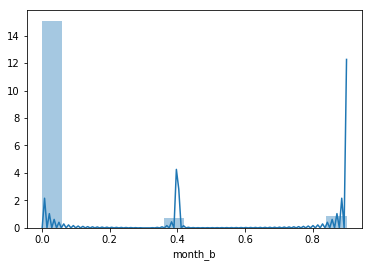

In [27]:
sns.distplot(df["month_b"])

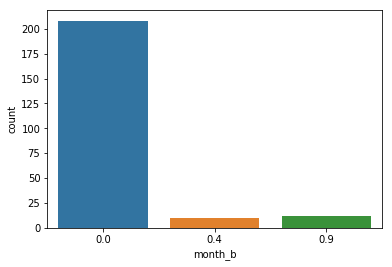

In [28]:
sns.countplot(x="month_b",data=df)

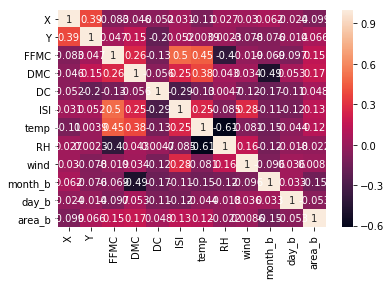

In [29]:
sns.heatmap(df.corr(),annot=True)

In [150]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x=df.drop(["area_b","month_b"],axis=1) #month_b has so many zeroes after normalization, hence dropping it from x
y=df["area_b"]
bestfeatures=SelectKBest(score_func=f_classif)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x)
dfscores.sort_values(ascending=False,by=0,inplace=True)
l=[]
c=0
z=pd.DataFrame()
for i,r in dfscores.iterrows():
    l=l+[i]
    z[c]=x.iloc[:,i]
    c=c+1

In [151]:
y=df.iloc[:,11]
k=int(input("Enter k: "))
x=z.iloc[:,:k]
maxi,p=0,0
for a in range(101):
    Xtr,Xtst,Ytr,Ytst=train_test_split(x,y,random_state=a,test_size=0.3)
    scX=StandardScaler()
    Xtr=scX.fit_transform(Xtr)
    Xtst=scX.fit_transform(Xtst)
    Classifier=KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')
    Classifier.fit(Xtr,Ytr)
    yp=Classifier.predict(Xtst)
    sco=accuracy_score(Ytst,yp)
    if maxi<sco:
        p=a
        maxi=sco
print(maxi,p)

Enter k: 4
0.7246376811594203 93
